In [166]:
#Dataset and Plot Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from collections import Counter
from scipy import stats
from scipy import stats
from tqdm import tqdm_notebook
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from tensorflow import keras
import plotly.express as px
from warnings import filterwarnings

# Modeling Libraries
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import VotingClassifier

# Evaluation 
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

In [52]:
df = pd.read_csv('/content/water_potability.csv')

#Data Wrangling and EDA🍵
---






In [170]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [54]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [171]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [172]:
df.count()

ph                 3276
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            3276
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3276
Turbidity          3276
Potability         3276
dtype: int64

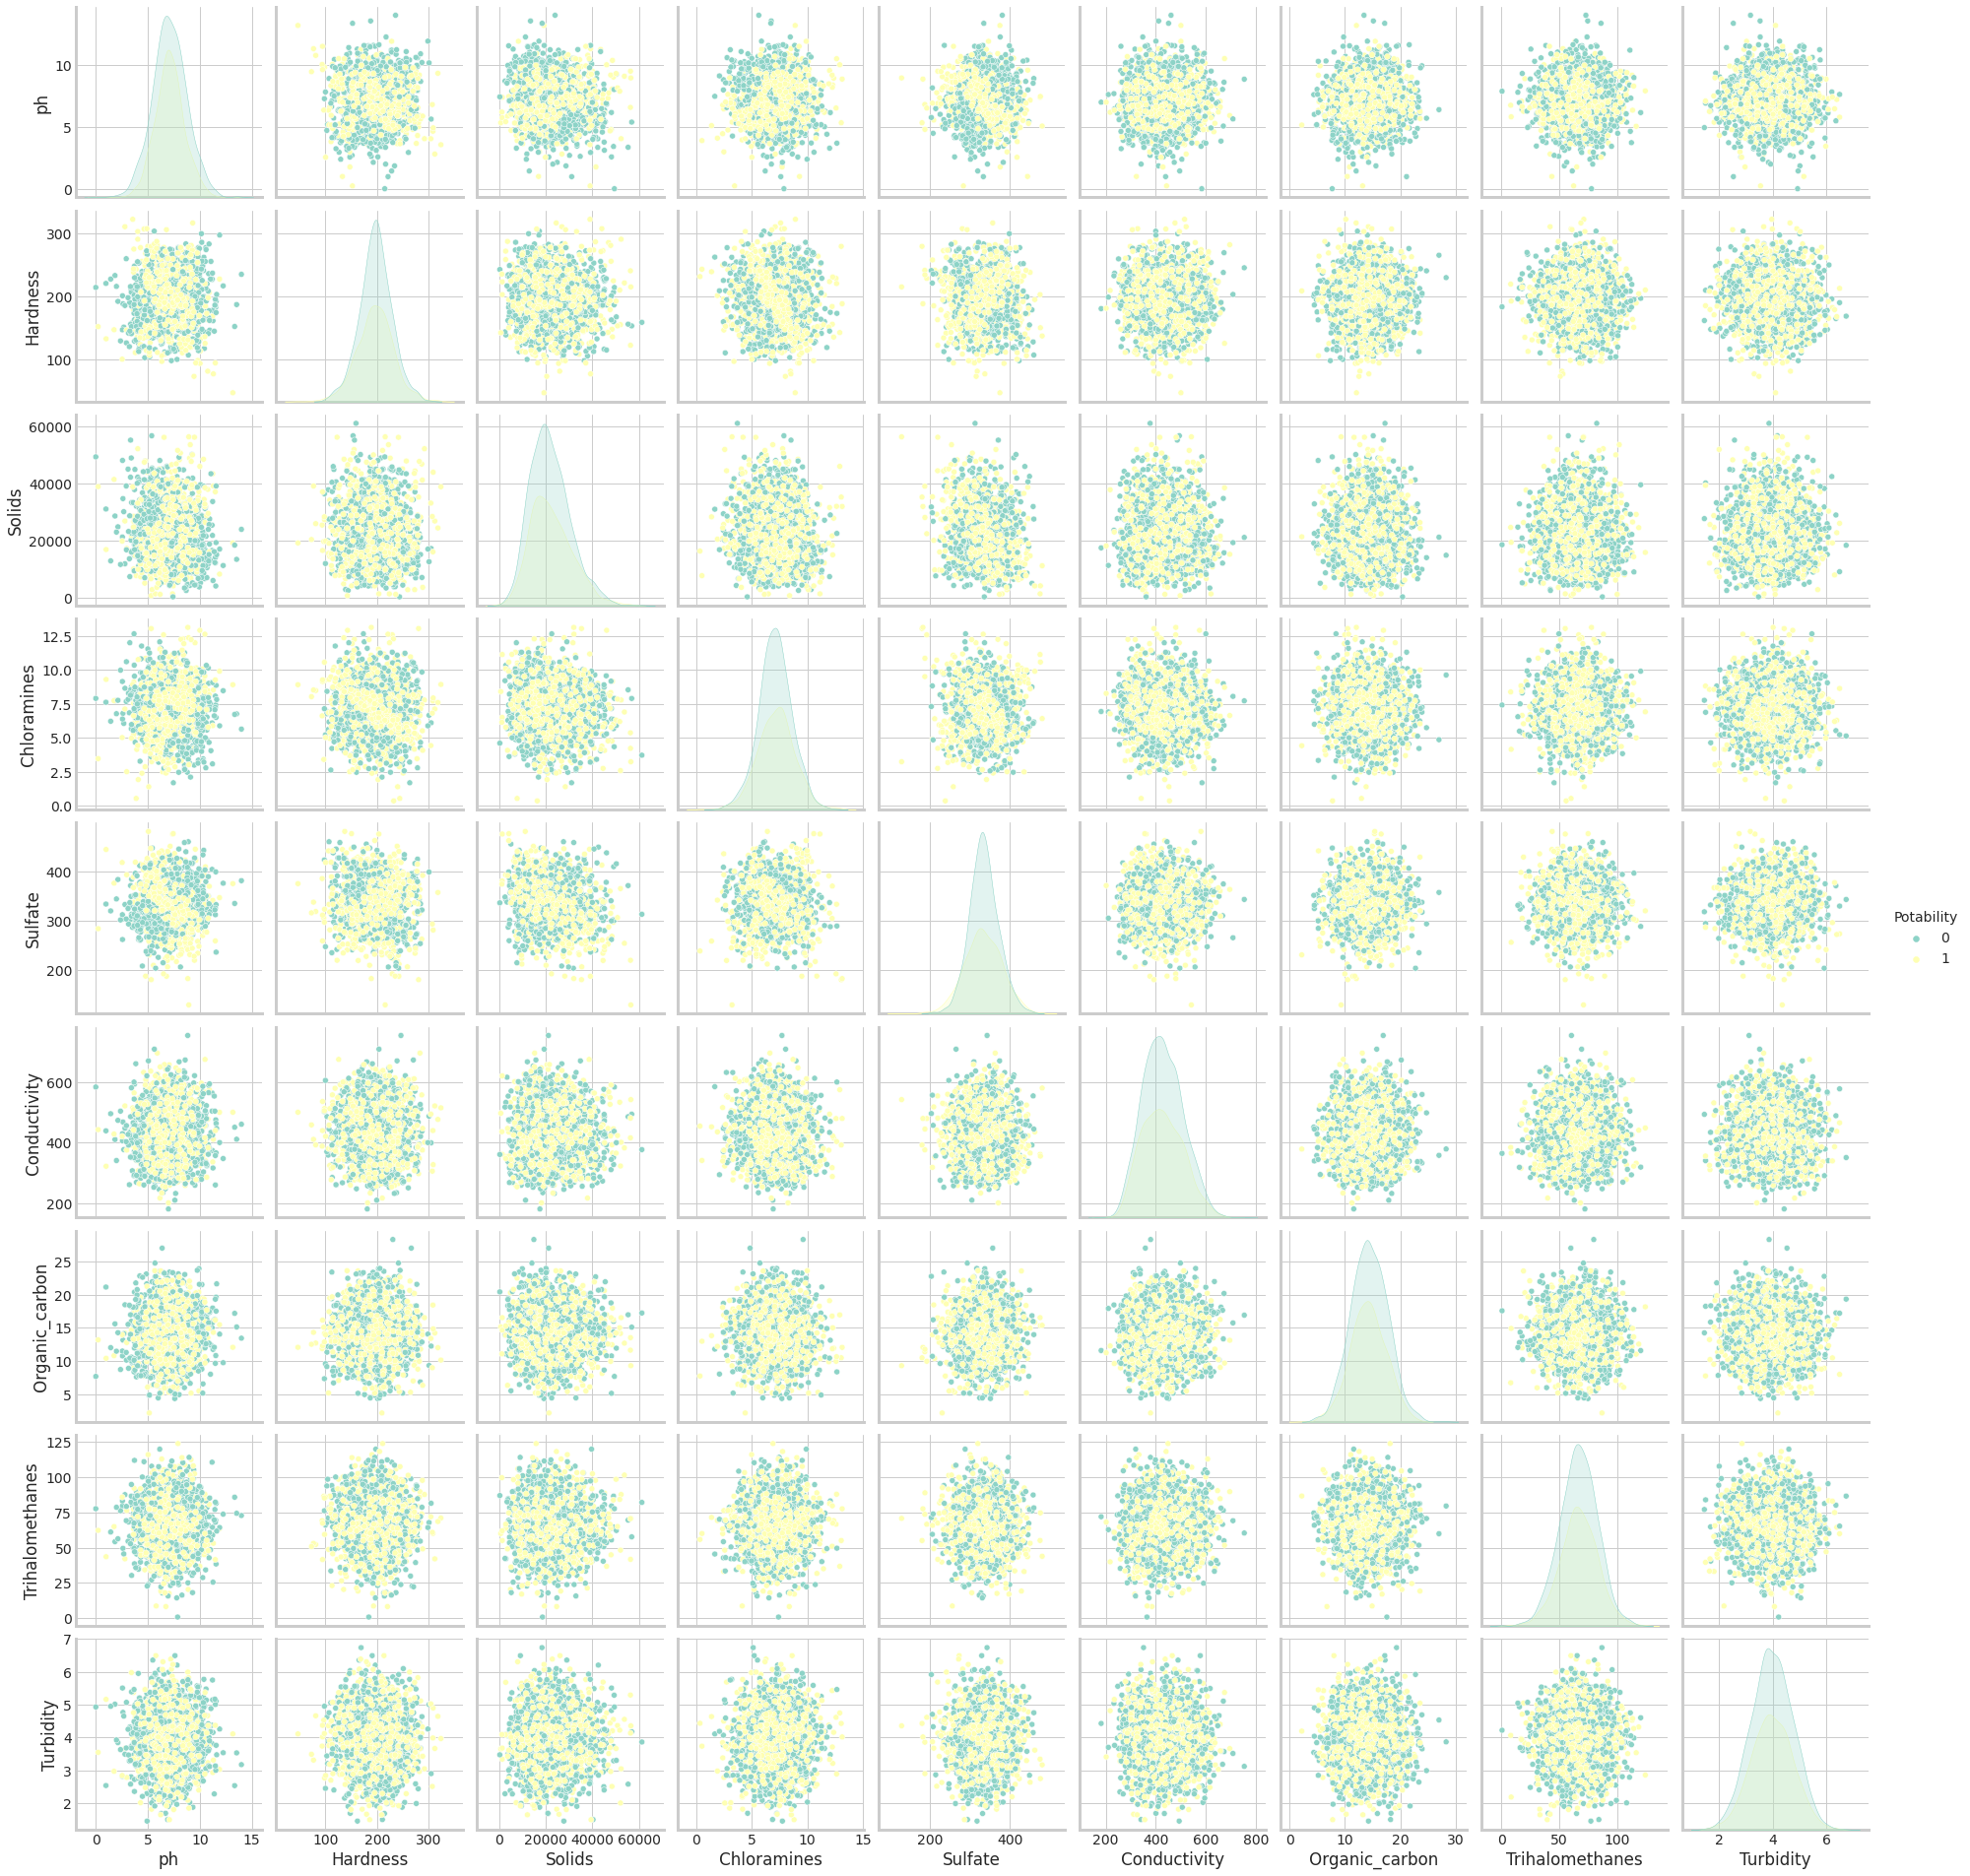

In [56]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='Potability', height=3)
plt.show()


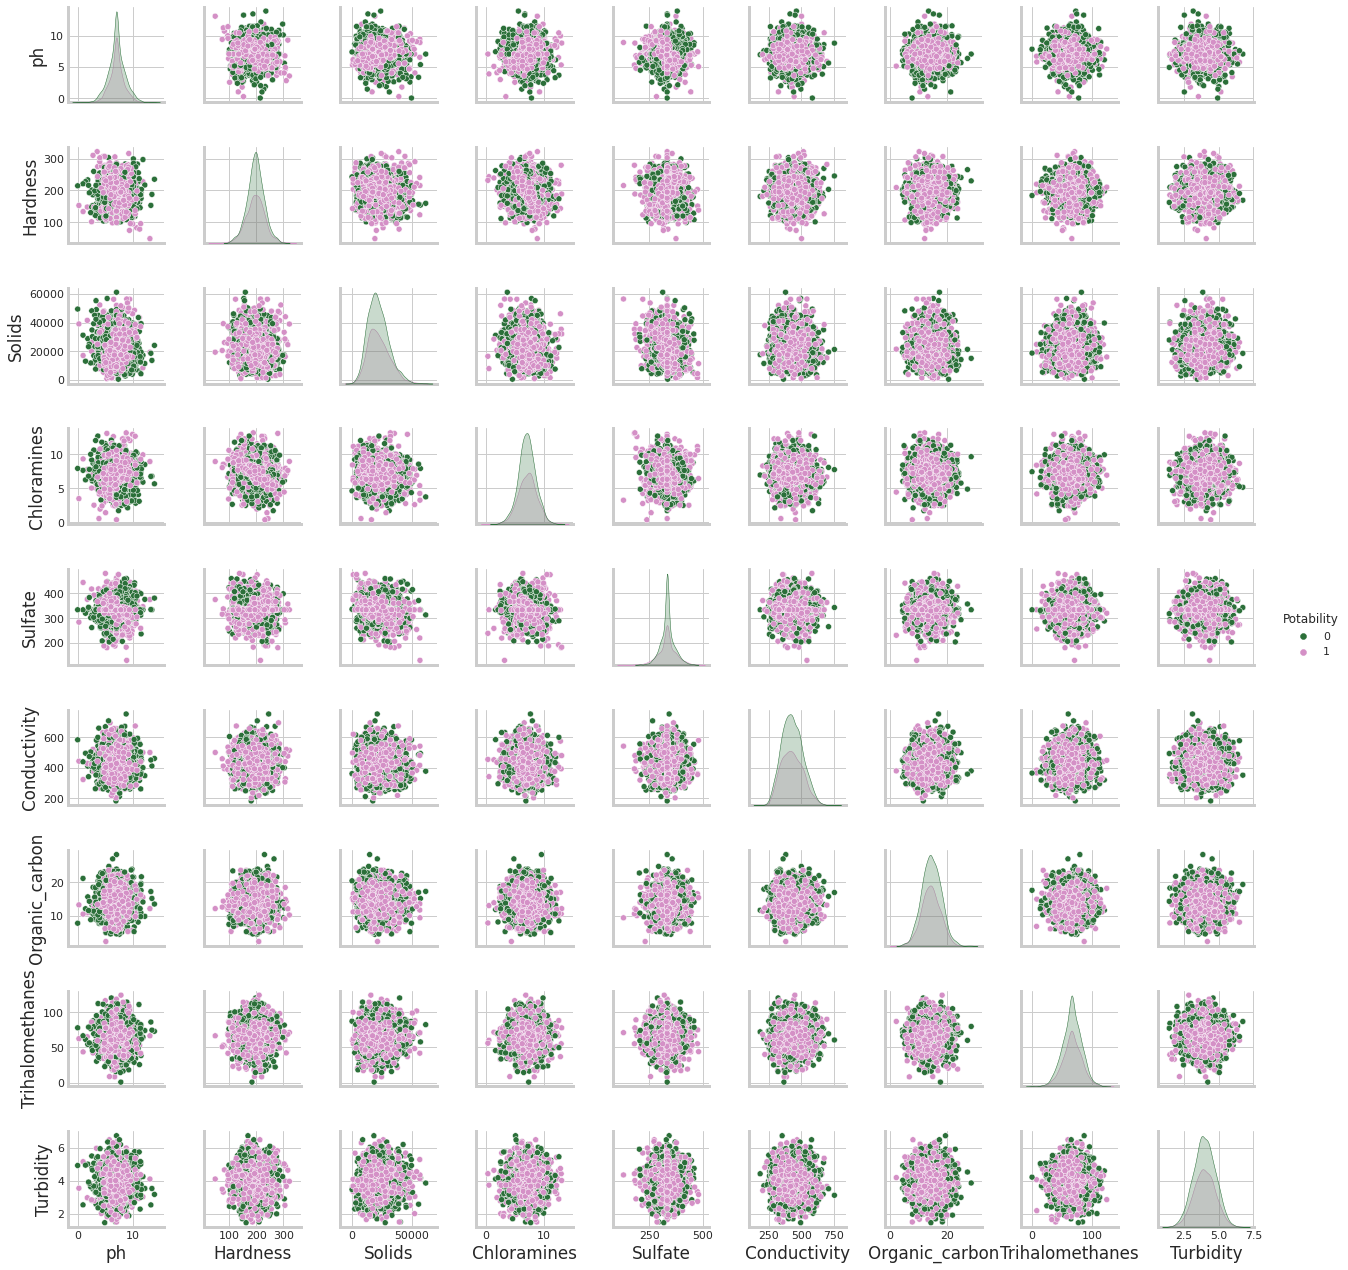

In [97]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='Potability', height=2, palette='cubehelix')
plt.show()


In [59]:
#Counting total number of NaN values in Dataset
df.isna().sum().sum()

1434

In [60]:
#looking for missing values in each columns
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [79]:
df1 = df.fillna(df.median())

Your Charts are being ready:   0%|          | 0/9 [00:00<?, ?it/s]

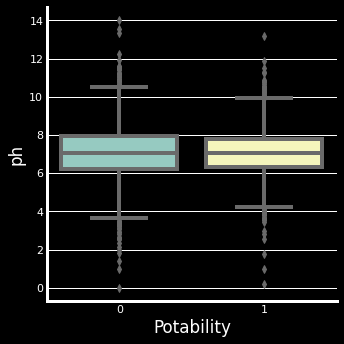

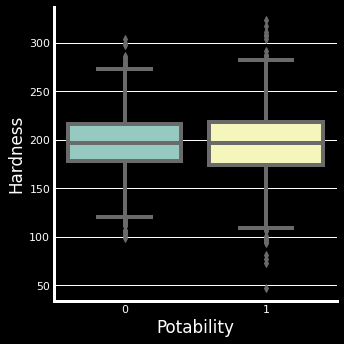

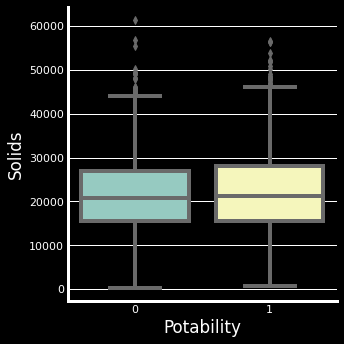

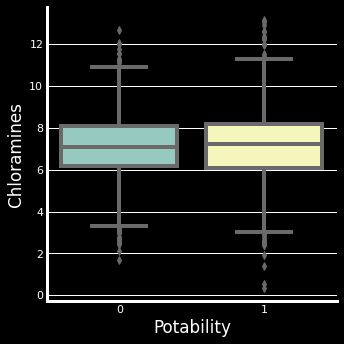

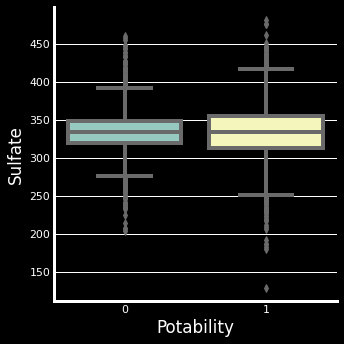

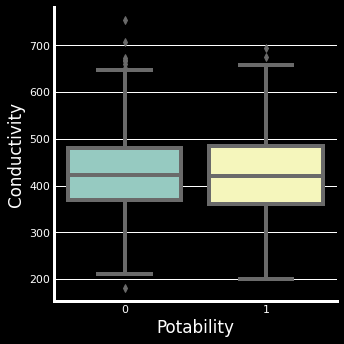

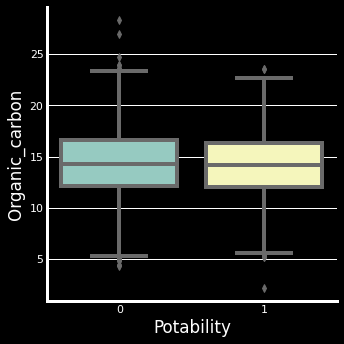

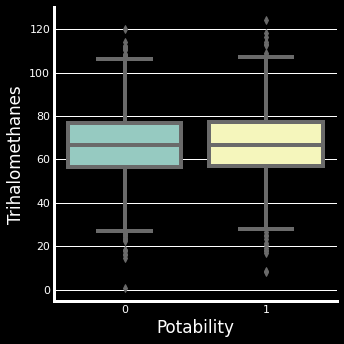

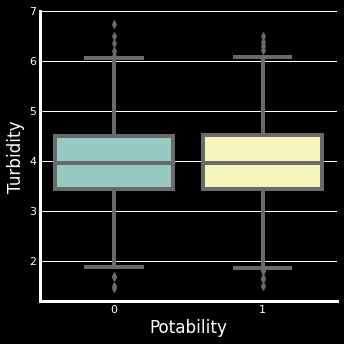

In [169]:
filterwarnings('ignore')
cols = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

def boxPlotter(dataset, columnName):
    
    sns.catplot(x="Potability", y=columnName, data=df, kind="box");
for column in tqdm_notebook(cols, desc = "Your Charts are being ready"):
    boxPlotter(df, column)

In [93]:
#For replacing NaN values we either use Mean, Median Or Mode 

df['ph'].fillna(value=df['ph'].mean(),inplace=True)

df['Sulfate'].fillna(value=df['Sulfate'].mean(),inplace=True)

df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].mean(),inplace=True)


In [94]:
df.isna()

ph  Hardness  Solids  Chloramines  Sulfate  Conductivity  \
0     False     False   False        False    False         False   
1     False     False   False        False    False         False   
2     False     False   False        False    False         False   
3     False     False   False        False    False         False   
4     False     False   False        False    False         False   
...     ...       ...     ...          ...      ...           ...   
3271  False     False   False        False    False         False   
3272  False     False   False        False    False         False   
3273  False     False   False        False    False         False   
3274  False     False   False        False    False         False   
3275  False     False   False        False    False         False   

      Organic_carbon  Trihalomethanes  Turbidity  Potability  
0              False            False      False       False  
1              False            False      False       False  
2              False            False      False       False  
3              False            False      False       False  
4              False            False      False       False  
...              ...              ...        ...         ...  
3271           False            False      False       False  
3272           False            False      False       False  
3273           False            False      False       False  
3274           False            False      False       False  
3275           False            False      False       False  

[3276 rows x 10 columns]

In [95]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

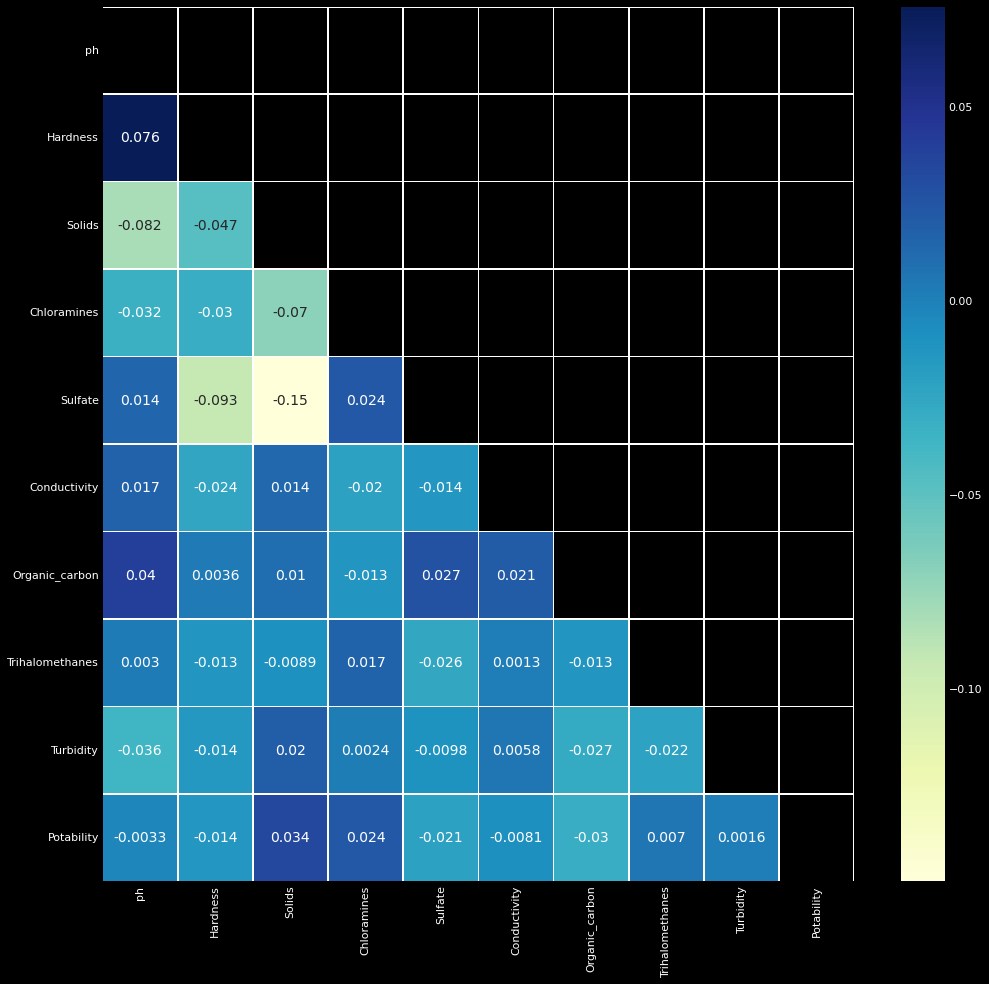

In [96]:
plt.figure(figsize=(15, 15))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True,linewidth=.8, mask=matrix, cmap="YlGnBu")

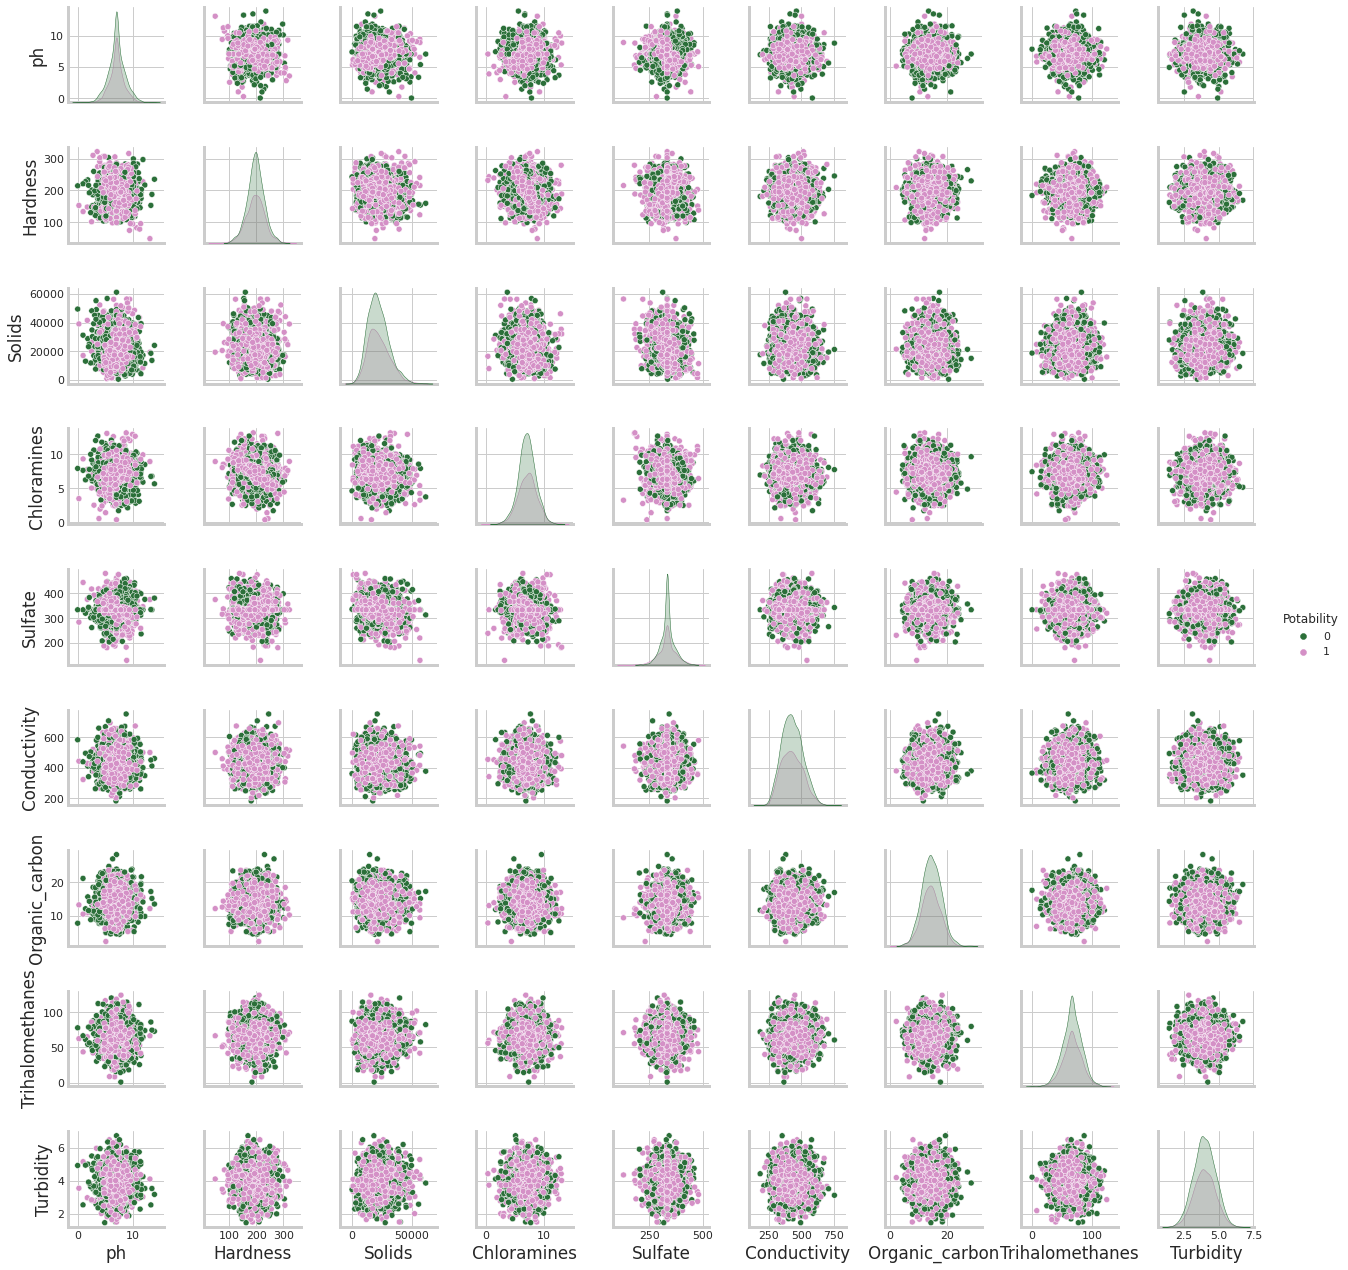

In [98]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='Potability', height=2, palette='cubehelix')
plt.show()

In [163]:
fig=px.pie(df,values=df['Potability'].value_counts(),
          names=[0,1],
          title='<b>Potability Percentage',
          hole=0.4,
          color_discrete_sequence=px.colors.qualitative.G10,
          template='plotly_dark')
fig.update_layout(title_font_size=20)
fig.show() 

#ML Model Developement and Testing:🤖

---




In [106]:
X = df.drop('Potability',axis=1).values

Y = df['Potability'].values
Y

array([0, 0, 0, ..., 1, 1, 1])

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [110]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [122]:


filterwarnings('ignore')

models =[("LR", LogisticRegression(max_iter=100)),("SVC", SVC()),('KNN',KNeighborsClassifier(n_neighbors=15)),
         ("DTC", DecisionTreeClassifier()),("GNB", GaussianNB()),
        ("SGDC", SGDClassifier()),("Perc", Perceptron()),("NC",NearestCentroid()),
        ("Ridge", RidgeClassifier()),("NuSVC", NuSVC()),("BNB", BernoulliNB()),
         ('RF',RandomForestClassifier()),('ADA',AdaBoostClassifier()),
        ('XGB',GradientBoostingClassifier()),('PAC',PassiveAggressiveClassifier())]

results = []
names = []
finalResults = []

for name,model in models:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    score = precision_score(y_test, model_results,average='macro')
    results.append(score)
    names.append(name)
    finalResults.append((name,score))
    
finalResults.sort(key=lambda k:k[1],reverse=True)


In [123]:
finalResults

[('SVC', 0.6887156004896404),
 ('NuSVC', 0.6679104841145351),
 ('XGB', 0.6296704124868115),
 ('RF', 0.6217005076142132),
 ('KNN', 0.6101492633339767),
 ('GNB', 0.600993180261473),
 ('SGDC', 0.5624442731710266),
 ('ADA', 0.5601161202185793),
 ('Perc', 0.549034522531122),
 ('DTC', 0.5460222193844975),
 ('NC', 0.5107445345001906),
 ('PAC', 0.48490851134293755),
 ('LR', 0.297558494404883),
 ('Ridge', 0.297558494404883),
 ('BNB', 0.297558494404883)]

In [140]:
from sklearn import linear_model, datasets
lasso = linear_model.LassoCV()

lasso.fit(X, Y)

lasso.alpha_

0.9494046170155261

In [144]:
accuracy1 = []
scaler = StandardScaler()
skf = RepeatedStratifiedKFold(n_splits=5,n_repeats=2)
skf.get_n_splits(X,Y)

for train_index, test_index in skf.split(X,Y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    lasso.fit(X_train,y_train)
    predictions=model.predict(X_test)
    score=accuracy_score(y_test,predictions)
    accuracy1.append(score) 

np.mean(accuracy1)

0.6098903835412399

In [145]:
#HyperParameter Tuning

model_params = {
    'XGB':
    {
        'model':GradientBoostingClassifier(),
        'params':
        {
            'learning_rate':[0.01,0.1],
            'n_estimators':[100,200,500,1000],
            'max_features':['sqrt','log2'],
            'max_depth':list(range(11))
        }
    },
    'Random Forest':
    {
        'model':RandomForestClassifier(),
        'params':
        {
            'n_estimators':[10,50,100,200],
            'max_features':['auto','sqrt','log2'],
            'max_depth':list(range(1,11))
        }
    }
}

In [146]:
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=1)
scores=[]
for model_name,params in model_params.items():
    rs = RandomizedSearchCV(params['model'],params['params'],cv=cv,n_iter=10)
    rs.fit(X,Y)
    scores.append([model_name,dict(rs.best_params_),rs.best_score_])
data=pd.DataFrame(scores,columns=['Model','Parameters','Score'])
data

Model                                         Parameters     Score
0            XGB  {'n_estimators': 1000, 'max_features': 'log2',...  0.664525
1  Random Forest  {'n_estimators': 100, 'max_features': 'sqrt', ...  0.670326

In [148]:
param=data['Parameters']
model = VotingClassifier(estimators=[
                                     ('XGB',GradientBoostingClassifier(**param[0])),
                                     ('RF',RandomForestClassifier(**param[1])),
                                    ],voting='hard')

accuracy=[]
scaler = StandardScaler()
skf = RepeatedStratifiedKFold(n_splits=5,n_repeats=2)
skf.get_n_splits(X,Y)

for train_index, test_index in skf.split(X,Y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    model.fit(X_train,y_train)
    predictions=model.predict(X_test)
    score=accuracy_score(y_test,predictions)
    accuracy.append(score)   

In [150]:
np.mean(accuracy)

0.6659011357289145

#End


--- 





